Hi! In this code I'm implementing Multivariate Gaussian Distrobution for Anomaly Detection from the scratch!

**1-** Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import mplcyberpunk                     # An optional library for modernizing matplotlib
                                        # install: pip install mplcyberpunk

**2-** Importing the dataset and separating the data:

In [2]:
df = pd.read_csv('AnomalyDetectionDataset.csv')
x1 = df.Temperature.values
x2 = df.Sales.values


**3-** Defining a function for calculating the mean of a vector:

In [3]:
def mu_calculator(m, l):
    li = np.array([[0] for i in range(len(l))])
    for i in range(len(li)):
        li[i] = sum(l[i])
    li = li/m
    return li


**4-** Defining a function for calculating the **Gaussian Probablity** for each example:

In [4]:
def Gaussian_P(l, mu, cov):
    n = len(mu)
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    
    for i in range(n):
        l[i] = l[i] - mu[i]

    
    exp = math.exp(-1/2 * (l.T.dot(cov_inv).dot(l)))
    
    return (1/(((2 * math.pi) ** n) * math.sqrt(cov_det))) * exp


**5-** Calculating the mean of the vectors and the covariance matrix:

In [5]:
mu = mu_calculator(25, np.array([x1, x2]))
stacked = np.stack((x1, x2), axis=0)
cov = np.cov(stacked)


**6-** Calculating the **Gaussian Probablity** for a set of example:
(with the mean and the covariance matrix of the previous data)

In [6]:
x = np.linspace(x1.min()-0.5,x1.max()+0.5,25)
y = np.linspace(x2.min()-10,x2.max()+10,25)
X, Y = np.meshgrid(x, y)

first_index_y = True
first_index_x = True

for i in x:
    for j in y:
        if(first_index_y):
            temp_y = Gaussian_P(np.array([i, j]), mu, cov)
            first_index_y = False
        else:
            temp_y = np.vstack((temp_y,Gaussian_P(np.array([i, j]), mu, cov)))
    first_index_y = True
    if(first_index_x):
        z = temp_y
        first_index_x = False
    else:
        z = np.hstack((z, temp_y))
        
# z will have the shape of (25,25) since we stack vertically and then horizontally

**7-** Plotting a contour map based on the Gaussian Probablity of the data:

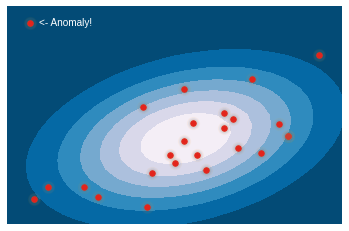

In [7]:
plt.style.use('cyberpunk')
plt.contourf(X,Y,z,cmap=plt.cm.PuBu_r)
plt.axis('off')
plt.scatter(x1,x2,c='red',s=30)
plt.text(14.0,476,"<- Anomaly!",c='white')
mplcyberpunk.make_scatter_glow()
plt.show()


**8-** Evaluating the Gaussian Probablity for two examples of the dataset:

In [8]:
print(f'Normal example  : {Gaussian_P(np.array([17.4,418]), mu, cov)}') #normal
print(f'Anomaly example : {Gaussian_P(np.array([13.8,477]), mu, cov)}') #anomaly


Normal example  : 0.0005279422954011893
Anomaly example : 3.17666693338128e-07


**9-** Diagnosing the anamolous examples with a custom Epsilon parameter:

In [9]:
anomaly_x = []
anomaly_y = []
normal_x = []
normal_y = []
epsilon = 0.0001
for i, j in zip(x1, x2):
    if(Gaussian_P(np.array([i, j]), mu, cov) < epsilon):
        anomaly_x.append(i)
        anomaly_y.append(j)
    else:
        normal_x.append(i)
        normal_y.append(j)
        

**10-** Visualizing the final output:

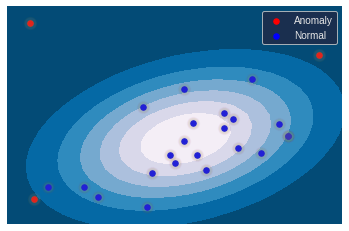

In [10]:
plt.contourf(X,Y,z,cmap=plt.cm.PuBu_r)
plt.axis('off')
anomaly = plt.scatter(anomaly_x,anomaly_y,c='red',s=30)
mplcyberpunk.make_scatter_glow()
normal = plt.scatter(normal_x,normal_y,c='blue',s=30)
mplcyberpunk.make_scatter_glow()

plt.legend((anomaly,normal),['Anomaly','Normal'],loc='upper right',frameon=True)
plt.show()